##  Preprocessing the Data

In [17]:
import pandas as pd

file_path = r"electricity-prod-source-stacked.csv"
data = pd.read_csv(file_path)

data.rename(columns={
    'Other renewables excluding bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Other_Renewables_TWh',
    'Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Bioenergy_TWh',
    'Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Solar_TWh',
    'Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Wind_TWh',
    'Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Hydro_TWh',
    'Electricity from nuclear - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Nuclear_TWh',
    'Electricity from oil - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Oil_TWh',
    'Electricity from gas - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Gas_TWh',
    'Electricity from coal - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Coal_TWh',
}, inplace=True)

sweden_data = data[data['Entity'] == 'Sweden']

print(sweden_data.head())


      Entity Code  Year  Other_Renewables_TWh  Bioenergy_TWh  Solar_TWh  \
5525  Sweden  SWE  1990                   0.0           1.94        0.0   
5526  Sweden  SWE  1991                   0.0           1.86        0.0   
5527  Sweden  SWE  1992                   0.0           2.01        0.0   
5528  Sweden  SWE  1993                   0.0           2.17        0.0   
5529  Sweden  SWE  1994                   0.0           2.23        0.0   

      Wind_TWh  Hydro_TWh  Nuclear_TWh  Oil_TWh  Gas_TWh  Coal_TWh  
5525      0.01      72.50        68.18     1.85     0.42      1.08  
5526      0.01      63.24        76.76     2.56     0.58      1.96  
5527      0.03      74.33        63.54     3.43     0.79      1.80  
5528      0.05      74.65        61.40     4.00     0.91      2.08  
5529      0.07      59.10        73.16     4.67     0.86      2.61  


1. How has electricity production from renewable sources changed over time in Sweden?

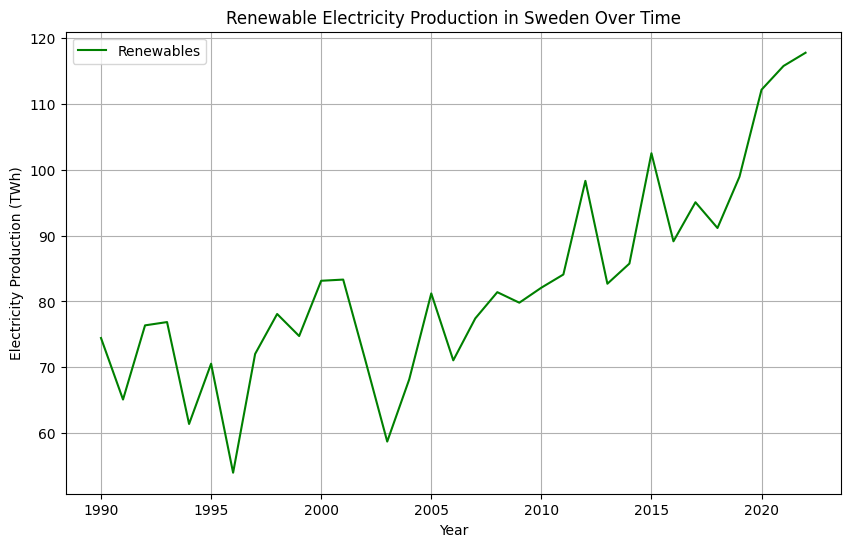

In [30]:
import matplotlib.pyplot as plt

sweden_data.loc[:, 'Total_Renewables_TWh'] = (
    sweden_data['Other_Renewables_TWh'] +
    sweden_data['Bioenergy_TWh'] +
    sweden_data['Solar_TWh'] +
    sweden_data['Wind_TWh'] +
    sweden_data['Hydro_TWh']
)

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(sweden_data['Year'], sweden_data['Total_Renewables_TWh'], label='Renewables', color='green')
plt.title('Renewable Electricity Production in Sweden Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()


2. What is the trend in electricity production from non-renewable sources over time in Sweden?

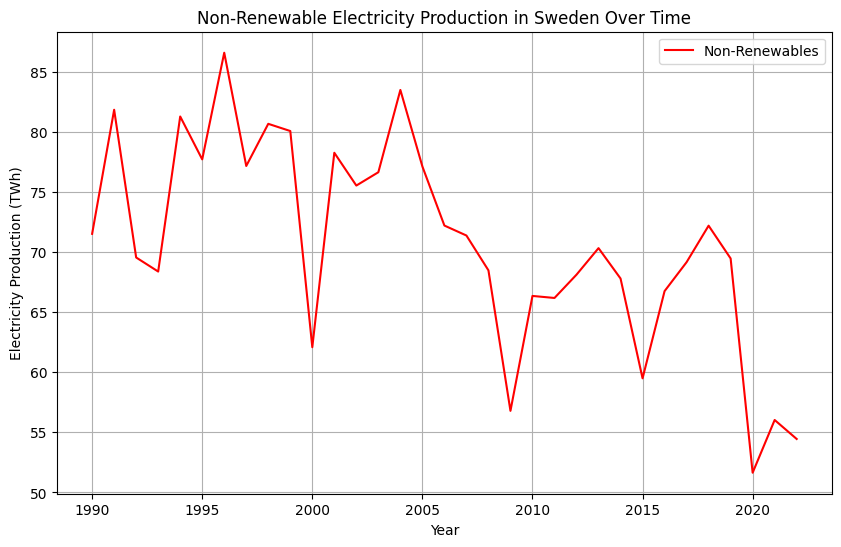

In [31]:
import matplotlib.pyplot as plt

sweden_data.loc[:, 'Total_NonRenewables_TWh'] = (
    sweden_data['Nuclear_TWh'] +
    sweden_data['Coal_TWh'] +
    sweden_data['Gas_TWh'] +
    sweden_data['Oil_TWh']
)

plt.figure(figsize=(10, 6))
plt.plot(sweden_data['Year'], sweden_data['Total_NonRenewables_TWh'], label='Non-Renewables', color='red')
plt.title('Non-Renewable Electricity Production in Sweden Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()


3. Which energy source is the largest contributor to electricity production in Sweden for a given year?

In [32]:
sweden_data.loc[:, 'Largest_Contributor'] = sweden_data.loc[:, 'Other_Renewables_TWh':'Coal_TWh'].idxmax(axis=1)

latest_year = sweden_data['Year'].max()
largest_contributor_recent = sweden_data[sweden_data['Year'] == latest_year][['Year', 'Largest_Contributor']]
print(largest_contributor_recent)


      Year Largest_Contributor
5557  2022           Hydro_TWh


4. How does the total electricity production change year over year in Sweden?

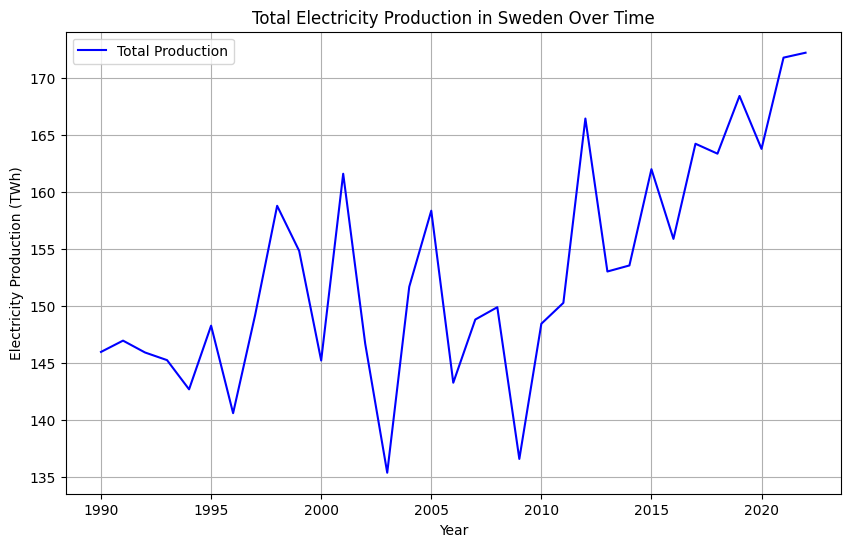

In [33]:
import matplotlib.pyplot as plt

sweden_data.loc[:, 'Total_Production_TWh'] = sweden_data.loc[:, 'Other_Renewables_TWh':'Coal_TWh'].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sweden_data['Year'], sweden_data['Total_Production_TWh'], label='Total Production', color='blue')
plt.title('Total Electricity Production in Sweden Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()


5. What is the percentage contribution of each energy source to the total electricity production in Sweden?

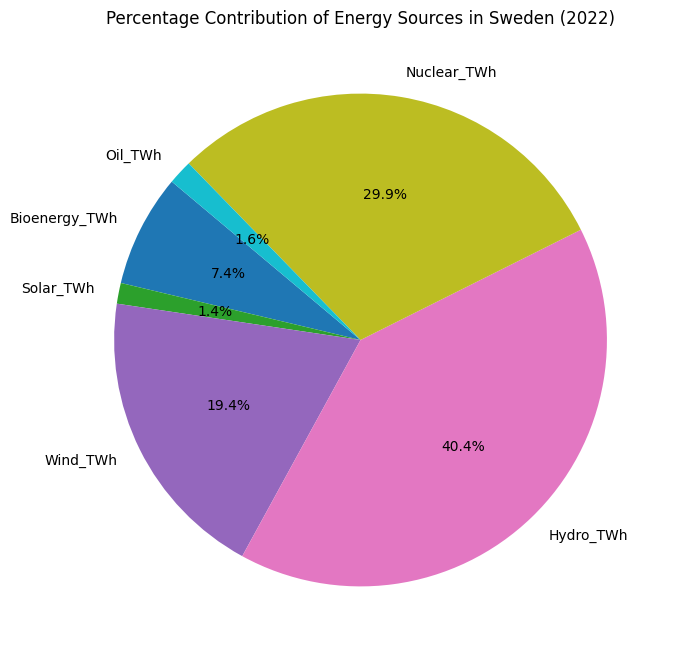

In [22]:
import matplotlib.pyplot as plt

latest_data = sweden_data[sweden_data['Year'] == latest_year]

energy_sources = [
    'Other_Renewables_TWh', 'Bioenergy_TWh', 'Solar_TWh', 'Wind_TWh', 'Hydro_TWh', 
    'Nuclear_TWh', 'Oil_TWh', 'Gas_TWh', 'Coal_TWh'
]

latest_data_percent = latest_data[energy_sources].iloc[0] / latest_data['Total_Production_TWh'].values[0] * 100

latest_data_percent = latest_data_percent[latest_data_percent > 1]

plt.figure(figsize=(8, 8))
latest_data_percent.plot.pie(autopct='%1.1f%%', startangle=140, colormap='tab10', labels=latest_data_percent.index)
plt.title(f'Percentage Contribution of Energy Sources in Sweden ({latest_year})')
plt.ylabel('')  
plt.show()


6. How does Sweden's energy mix compare to other regions/entities in the dataset?

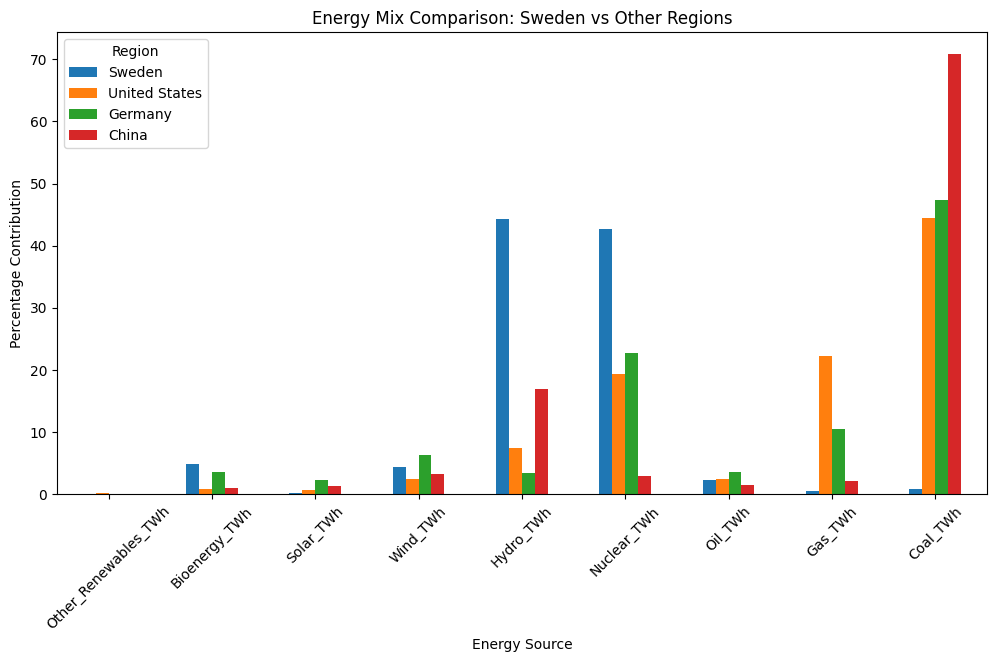

In [23]:
regional_mix = data.groupby('Entity')[energy_sources].mean()

regional_mix_percent = regional_mix.div(regional_mix.sum(axis=1), axis=0) * 100

selected_regions = regional_mix_percent.loc[['Sweden', 'United States', 'Germany', 'China']]
selected_regions.T.plot(kind='bar', figsize=(12, 6))
plt.title('Energy Mix Comparison: Sweden vs Other Regions')
plt.ylabel('Percentage Contribution')
plt.xlabel('Energy Source')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()


7. Are there periods with significant shifts from non-renewables to renewables in Sweden?

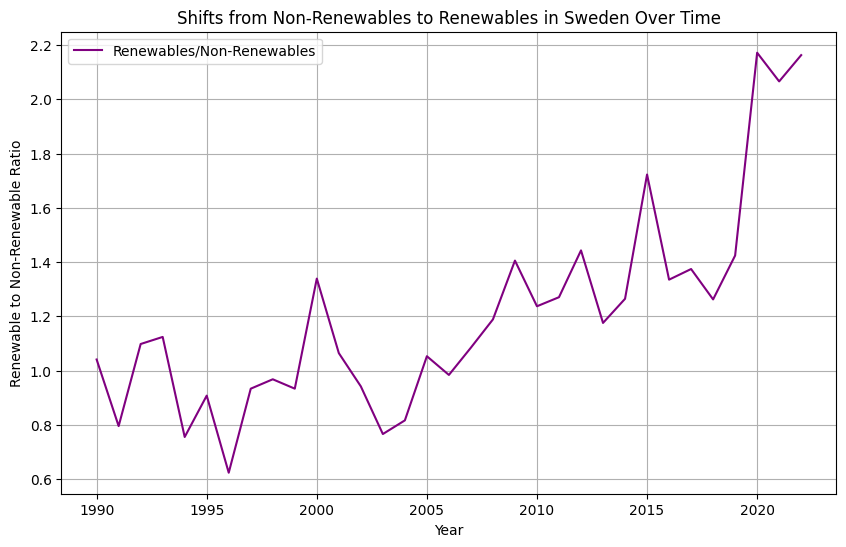

In [24]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='pandas')

sweden_data_copy = sweden_data.copy()

sweden_data_copy['Renewable_to_NonRenewable_Ratio'] = (
    sweden_data_copy['Total_Renewables_TWh'] / sweden_data_copy['Total_NonRenewables_TWh']
)

sweden_data_copy['Renewable_to_NonRenewable_Ratio'] = sweden_data_copy['Renewable_to_NonRenewable_Ratio'].replace([float('inf'), -float('inf')], float('nan'))

sweden_data_copy = sweden_data_copy.dropna(subset=['Renewable_to_NonRenewable_Ratio'])

plt.figure(figsize=(10, 6))
plt.plot(sweden_data_copy['Year'], sweden_data_copy['Renewable_to_NonRenewable_Ratio'], label='Renewables/Non-Renewables', color='purple')
plt.title('Shifts from Non-Renewables to Renewables in Sweden Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable to Non-Renewable Ratio')
plt.legend()
plt.grid()
plt.show()


8. Which renewable energy source has seen the highest growth in Sweden over the years?


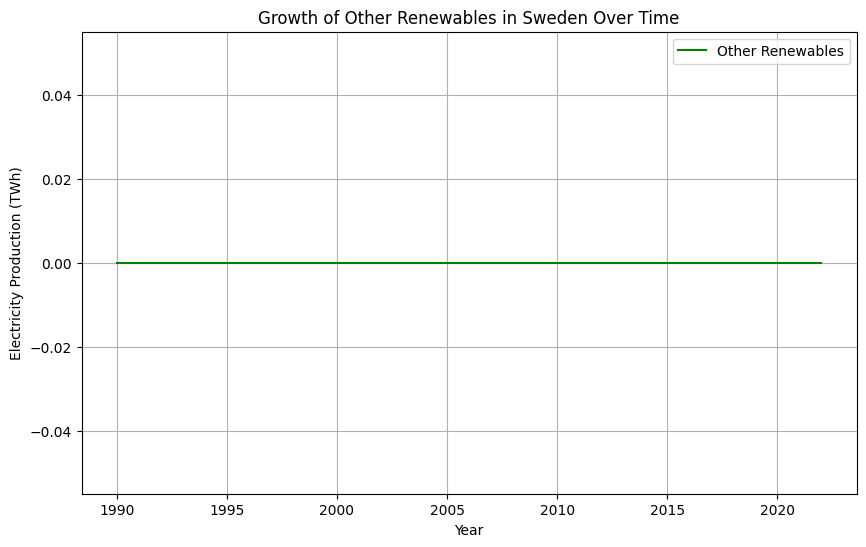

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(sweden_data['Year'], sweden_data['Other_Renewables_TWh'], label='Other Renewables', color='green')
plt.title('Growth of Other Renewables in Sweden Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()


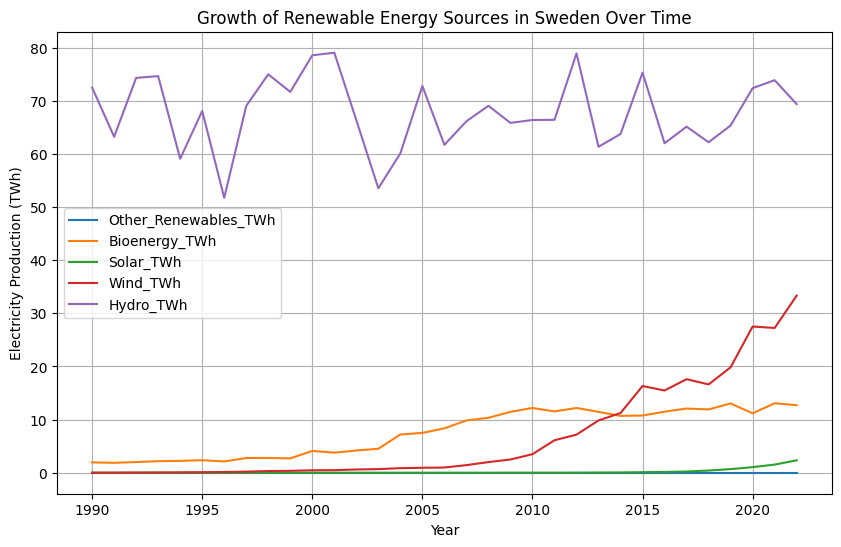

In [26]:
import matplotlib.pyplot as plt

renewable_sources = ['Other_Renewables_TWh', 'Bioenergy_TWh', 'Solar_TWh', 'Wind_TWh', 'Hydro_TWh']



plt.figure(figsize=(10, 6))

for source in renewable_sources:
    plt.plot(sweden_data['Year'], sweden_data[source], label=source)

plt.title('Growth of Renewable Energy Sources in Sweden Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid()

plt.show()


In [27]:
peaks_troughs = sweden_data.loc[:, 'Other_Renewables_TWh':'Coal_TWh'].agg(['max', 'min'])
print(peaks_troughs)


     Other_Renewables_TWh  Bioenergy_TWh  Solar_TWh  Wind_TWh  Hydro_TWh  \
max                   0.0          13.08       2.34     33.33      79.06   
min                   0.0           1.86       0.00      0.01      51.74   

     Nuclear_TWh  Oil_TWh  Gas_TWh  Coal_TWh  
max        77.49     7.97     2.91      3.69  
min        49.20     1.85     0.10      0.00  


9. What is the correlation between nuclear and renewable electricity production in Sweden?

The correlation between nuclear and renewable electricity production is: -0.7197589279638743


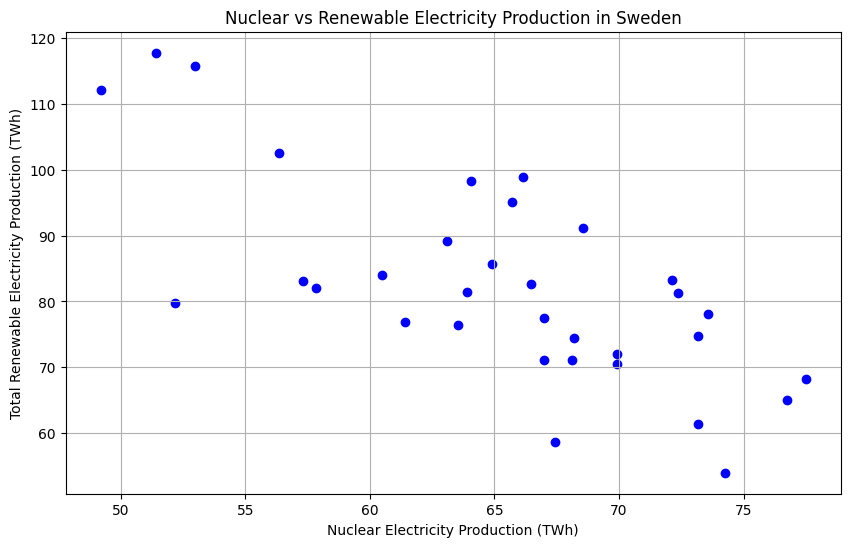

In [28]:
correlation = sweden_data['Nuclear_TWh'].corr(sweden_data['Total_Renewables_TWh'])
print(f"The correlation between nuclear and renewable electricity production is: {correlation}")
plt.figure(figsize=(10, 6))
plt.scatter(sweden_data['Nuclear_TWh'], sweden_data['Total_Renewables_TWh'], color='blue')
plt.title('Nuclear vs Renewable Electricity Production in Sweden')
plt.xlabel('Nuclear Electricity Production (TWh)')
plt.ylabel('Total Renewable Electricity Production (TWh)')
plt.grid(True)
plt.show()



10. What are the peaks and troughs of electricity production for each energy source in Sweden over time?

In [29]:
peaks_troughs = sweden_data.loc[:, 'Other_Renewables_TWh':'Coal_TWh'].agg(['max', 'min'])
print(peaks_troughs)


     Other_Renewables_TWh  Bioenergy_TWh  Solar_TWh  Wind_TWh  Hydro_TWh  \
max                   0.0          13.08       2.34     33.33      79.06   
min                   0.0           1.86       0.00      0.01      51.74   

     Nuclear_TWh  Oil_TWh  Gas_TWh  Coal_TWh  
max        77.49     7.97     2.91      3.69  
min        49.20     1.85     0.10      0.00  
